In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)

In [2]:
# Nos traemos el data set 
ff = pd.read_csv("../../Raw Data/female_players_22.csv",encoding = "ISO-8859-1")

In [3]:
#Seleccionamos las columnas que nos interesan
selected_columns = ff[["short_name","player_positions","overall","nationality_name","age","dob","height_cm","weight_kg",]]
df = selected_columns.copy()
df.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,height_cm,weight_kg
0,L. Bronze,"RB, CM",92,England,29,1991-10-28,171,67
1,W. Renard,CB,92,France,30,1990-07-20,187,70
2,V. Miedema,ST,92,Netherlands,24,1996-07-15,178,65


In [4]:
df['year'] = pd.DatetimeIndex(df['dob']).year
df['month'] = pd.DatetimeIndex(df['dob']).month
df['day'] = pd.DatetimeIndex(df['dob']).day
df.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,height_cm,weight_kg,year,month,day
0,L. Bronze,"RB, CM",92,England,29,1991-10-28,171,67,1991,10,28
1,W. Renard,CB,92,France,30,1990-07-20,187,70,1990,7,20
2,V. Miedema,ST,92,Netherlands,24,1996-07-15,178,65,1996,7,15


In [5]:
df.drop(df[(df['nationality_name'] == "Brazil") & (df['month'] == 2)  & (df['day'] == 29)].index, inplace=True)

In [6]:
df = df.loc[df["nationality_name"] != "England"]
df = df.loc[df["nationality_name"] != "United States"]
df = df.loc[df["nationality_name"] != "Scotland"]
df = df.loc[df["nationality_name"] != "Netherlands"]

In [7]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4   

In [8]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

In [9]:
df.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,height_cm,weight_kg,year,month,day,trimestre
1,W. Renard,CB,92,France,30,1990-07-20,187,70,1990,7,20,3
3,S. Kerr,"ST, LW",91,Australia,27,1993-09-10,167,55,1993,9,10,3
5,D. MarozsÃ¡n,"CAM, LM, CM",90,Germany,29,1992-04-18,171,67,1992,4,18,2


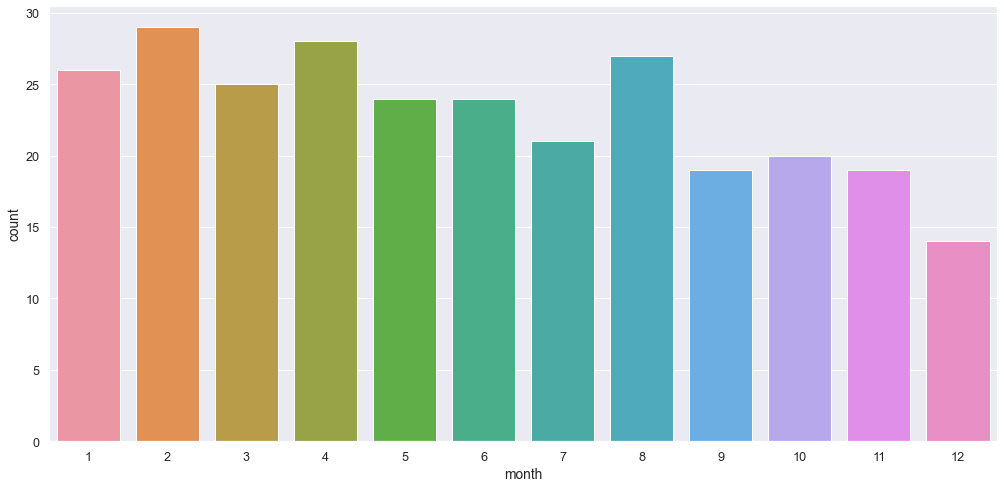

In [10]:
ax = sns.countplot(x="month", data=df)

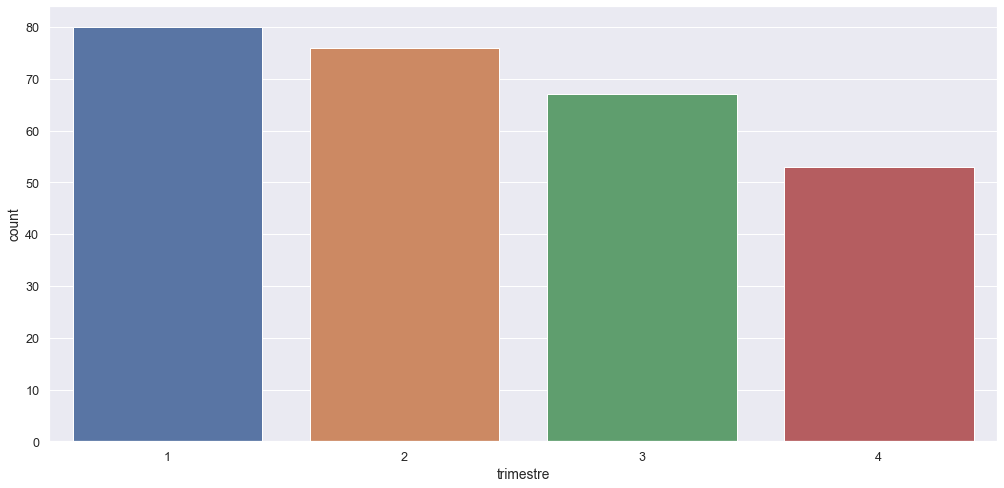

In [11]:
ax = sns.countplot(x="trimestre", data=df)

[Text(0, 0.5, 'Percent')]

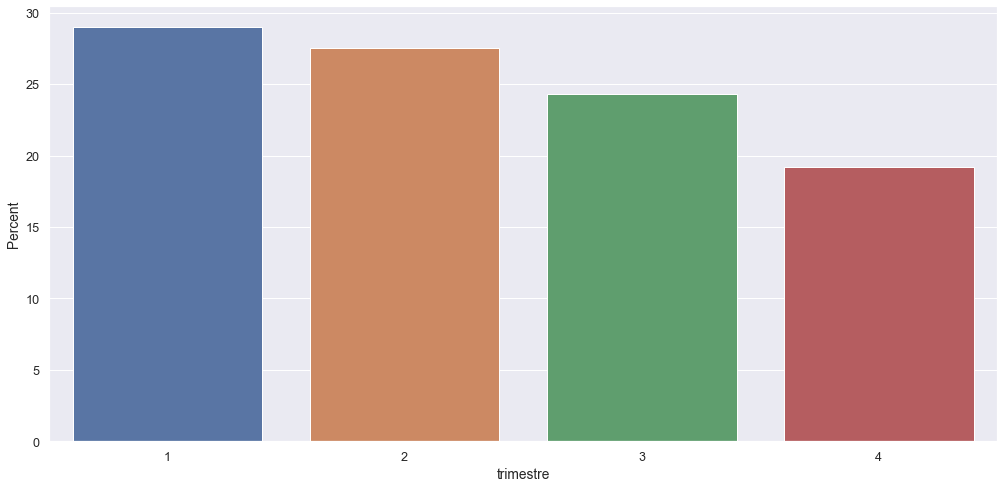

In [12]:
ax = sns.barplot(x="trimestre", y="trimestre", data=df, estimator=lambda x: len(x) / len(df) * 100) 
ax.set(ylabel="Percent")

In [13]:
df.to_csv('../../Data/mujeresf.csv', encoding='utf-8')